In [1]:
pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/AI Projects/CustomerChurn_dataset (1).csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
for col in df:
    if df[col].dtype == 'O':  # Check if the column type is object (string)
        df[col] = pd.factorize(df[col])[0]

In [9]:
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [10]:
df.astype(float)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.85,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,34.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,56.95,1.0,0.0
2,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.85,2.0,1.0
3,3.0,1.0,0.0,1.0,0.0,45.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,2.0,42.30,3.0,0.0
4,4.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.70,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038.0,1.0,0.0,0.0,1.0,24.0,1.0,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,84.80,6526.0,0.0
7039,7039.0,0.0,0.0,0.0,1.0,72.0,1.0,2.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,103.20,6527.0,0.0
7040,7040.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.60,6528.0,0.0
7041,7041.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,74.40,6529.0,1.0


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']


Feature Engineering

In [14]:
model = RandomForestClassifier()

In [15]:
model.fit(X, y)

RandomForestClassifier()

In [16]:
feature_importances = model.feature_importances_


In [17]:
feature_names = X.columns
feature_imp =pd.DataFrame({'feature': feature_names, 'importance': feature_importances})


In [18]:
best=feature_imp.sort_values(by='importance', ascending=False)


In [19]:
best.head(10)

,feature,importance
5,tenure,0.165944
18,MonthlyCharges,0.141807
0,customerID,0.126644
19,TotalCharges,0.126443
15,Contract,0.080220
17,PaymentMethod,0.051935
12,TechSupport,0.041574
9,OnlineSecurity,0.041407
8,InternetService,0.024352
1,gender,0.022675


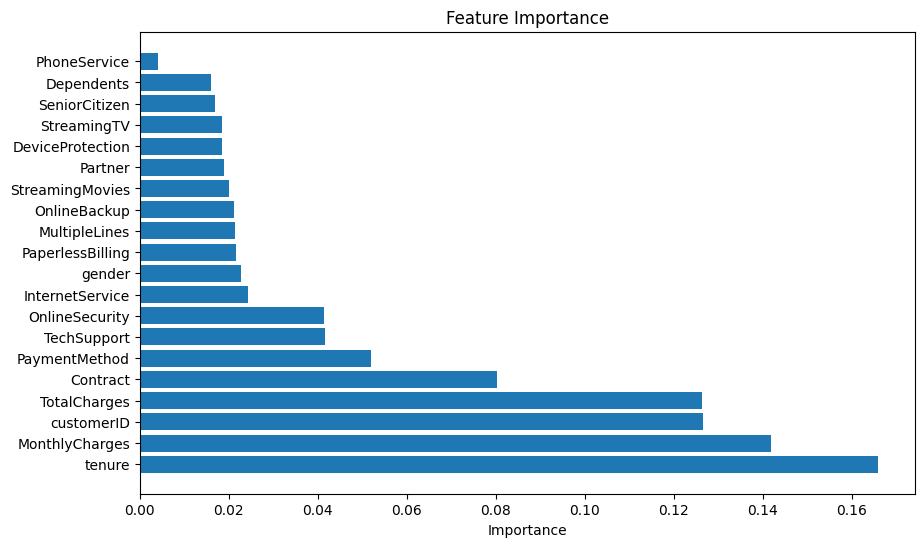

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(best['feature'], best['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [22]:
df=df[['tenure','MonthlyCharges','customerID','TotalCharges','Contract','PaymentMethod', 'OnlineSecurity','TechSupport','gender','OnlineBackup','InternetService',
       'PaperlessBilling','MultipleLines','Partner','StreamingMovies' ]]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   MonthlyCharges    7043 non-null   float64
 2   customerID        7043 non-null   int64  
 3   TotalCharges      7043 non-null   int64  
 4   Contract          7043 non-null   int64  
 5   PaymentMethod     7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   gender            7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  InternetService   7043 non-null   int64  
 11  PaperlessBilling  7043 non-null   int64  
 12  MultipleLines     7043 non-null   int64  
 13  Partner           7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 825.5 KB


In [24]:
X=df

In [25]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
sc=StandardScaler()
X_scaled = sc.fit_transform(X)

# new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

data = pd.concat([X_scaled_df, y], axis=1)

In [28]:
data

,tenure,MonthlyCharges,customerID,TotalCharges,Contract,PaymentMethod,OnlineSecurity,TechSupport,gender,OnlineBackup,InternetService,PaperlessBilling,MultipleLines,Partner,StreamingMovies,Churn
0,-1.277445,-1.160323,-1.731805,-1.667320,-0.828207,-1.145198,-0.903589,-0.909172,-1.009559,-1.180777,-1.183234,-0.829798,-2.061669,-1.034530,-1.078210,0
1,0.066327,-0.259629,-1.731313,-1.666793,0.371271,-0.274744,0.351386,-0.909172,0.990532,0.173655,-1.183234,1.205113,-0.505697,0.966622,-1.078210,0
2,-1.236724,-0.362660,-1.730821,-1.666265,-0.828207,-0.274744,0.351386,-0.909172,0.990532,-1.180777,-1.183234,-0.829798,-0.505697,0.966622,-1.078210,1
3,0.514251,-0.746535,-1.730329,-1.665737,0.371271,0.595711,0.351386,0.347362,0.990532,0.173655,-1.183234,1.205113,-2.061669,0.966622,-1.078210,0
4,-1.236724,0.197365,-1.729837,-1.665210,-0.828207,-1.145198,-0.903589,-0.909172,-1.009559,0.173655,0.172250,-0.829798,-0.505697,0.966622,-1.078210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,1.729837,1.776392,0.371271,-0.274744,0.351386,0.347362,0.990532,0.173655,-1.183234,-0.829798,1.050276,-1.034530,0.234693,0
7039,1.613701,1.277533,1.730329,1.776920,0.371271,1.466165,-0.903589,-0.909172,-1.009559,-1.180777,0.172250,-0.829798,1.050276,-1.034530,0.234693,0
7040,-0.870241,-1.168632,1.730821,1.777448,-0.828207,-1.145198,0.351386,-0.909172,-1.009559,0.173655,-1.183234,-0.829798,-2.061669,-1.034530,-1.078210,0
7041,-1.155283,0.320338,1.731313,1.777975,-0.828207,-0.274744,-0.903589,-0.909172,0.990532,0.173655,0.172250,-0.829798,1.050276,-1.034530,-1.078210,1


In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

MLP

In [55]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer1_dropout = Dropout(0.5)(hidden_layer_1)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer2_dropout = Dropout(0.5)(hidden_layer_2)
hidden_layer_3 = Dense(14, activation='relu')(hidden_layer_2)
hidden_layer3_dropout = Dropout(0.5)(hidden_layer_3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [62]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=34, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/34
177/177 [==============================] - 4s 7ms/step - loss: 0.4887 - accuracy: 0.7730 - val_loss: 0.5067 - val_accuracy: 0.7660
Epoch 2/34
177/177 [==============================] - 1s 6ms/step - loss: 0.5005 - accuracy: 0.7666 - val_loss: 0.4633 - val_accuracy: 0.7730
Epoch 3/34
177/177 [==============================] - 1s 7ms/step - loss: 0.4744 - accuracy: 0.7771 - val_loss: 0.4112 - val_accuracy: 0.8000
Epoch 4/34
177/177 [==============================] - 1s 5ms/step - loss: 0.4606 - accuracy: 0.7778 - val_loss: 1.0638 - val_accuracy: 0.5773
Epoch 5/34
177/177 [==============================] - 1s 5ms/step - loss: 0.5116 - accuracy: 0.7719 - val_loss: 0.4644 - val_accuracy: 0.7745
Epoch 6/34
177/177 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7737 - val_loss: 0.4407 - val_accuracy: 0.7816
Epoch 7/34
177/177 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.7847 - val_loss: 0.5844 - val_accuracy: 0.7574
Epoch 

In [70]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 1s 5ms/step - loss: 0.4267 - accuracy: 0.7989


79.88995313644409

In [71]:
_, val_accuracy = model.evaluate(X_val, y_val)
val_accuracy*100

22/22 [==============================] - 0s 7ms/step - loss: 0.4363 - accuracy: 0.7812


78.125

In [76]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from scikeras.wrappers import KerasClassifier

In [83]:
def create_model(activation='relu', dropout_rate=0.5):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer_1 = Dense(32, activation='relu')(input_layer)
    hidden_layer1_dropout = Dropout(dropout_rate)(hidden_layer_1)

    hidden_layer_2 = Dense(24, activation=activation)(hidden_layer1_dropout)
    hidden_layer2_dropout = Dropout(dropout_rate)(hidden_layer_2)

    hidden_layer_3 = Dense(14, activation=activation)(hidden_layer2_dropout)
    hidden_layer3_dropout = Dropout(dropout_rate)(hidden_layer_3)

    output_layer = Dense(1, activation='sigmoid')(hidden_layer3_dropout)
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


param_grid = {
    'epochs': [20,25,28,32,34,50, 100],
    'dropout_rate': [0.5],
    'batch_size': [32, 64, 128]
}


mlp = KerasClassifier(build_fn=create_model,dropout_rate=0.5)

# Use GridSearchCV to perform grid search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)

bestp=grid_search.best_params_
# Print the best parameters found
print("Best Parameters:", bestp)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/28


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


177/177 [==============================] - 2s 4ms/step - loss: 427.8679 - accuracy: 0.4379
Epoch 2/28
177/177 [==============================] - 1s 5ms/step - loss: 292.4165 - accuracy: 0.4815
Epoch 3/28
177/177 [==============================] - 1s 3ms/step - loss: 219.5930 - accuracy: 0.4988
Epoch 4/28
177/177 [==============================] - 1s 3ms/step - loss: 181.2250 - accuracy: 0.5034
Epoch 5/28
177/177 [==============================] - 0s 3ms/step - loss: 144.4786 - accuracy: 0.5383
Epoch 6/28
177/177 [==============================] - 1s 3ms/step - loss: 125.2046 - accuracy: 0.5373
Epoch 7/28
177/177 [==============================] - 1s 3ms/step - loss: 103.6997 - accuracy: 0.5385
Epoch 8/28
177/177 [==============================] - 1s 4ms/step - loss: 83.0885 - accuracy: 0.5655
Epoch 9/28
177/177 [==============================] - 1s 3ms/step - loss: 70.3220 - accuracy: 0.5731
Epoch 10/28
177/177 [==============================] - 1s 3ms/step - loss: 64.0274 - accuracy: 

In [95]:
model.save("/Users/brian/Desktop/Python/bestmodel.h5")